### ENCCS - Python for High Performance Data Analytics - Exercises

This notebook contains my solutions to exercises from the <b>ENCCS - Python for High-Performance Data Analytics</b> course. It serves as a practical reference for reviewing the course material and demonstrates my understanding of the concepts and tools covered in the course.

The course can be followed here: https://enccs.github.io/hpda-python/motivation/

#### Exercise 1:

This exercise is derived from Xarray Tutorials, which is distributed under an Apache-2.0 License.
First create an Xarray dataset:

In [1]:
import numpy as np
import xarray as xr

ds1 = xr.Dataset(
    data_vars={
        "a": (("x", "y"), np.random.randn(4, 2)),
        "b": (("z", "x"), np.random.randn(6, 4)),
    },
    coords={
        "x": np.arange(4),
        "y": np.arange(-2, 0),
        "z": np.arange(-3, 3),
    },
)
ds2 = xr.Dataset(
    data_vars={
        "a": (("x", "y"), np.random.randn(7, 3)),
        "b": (("z", "x"), np.random.randn(2, 7)),
    },
    coords={
        "x": np.arange(6, 13),
        "y": np.arange(3),
        "z": np.arange(3, 5),
    },
)

Then write the datasets to disk using to_netcdf() method:

In [2]:
ds1.to_netcdf("ds1.nc")
ds2.to_netcdf("ds2.nc")

You can read an individual file from disk by using open_dataset() method, or using the load_dataset() method:

In [3]:
ds3 = xr.open_dataset("ds1.nc")
ds4 = xr.load_dataset('ds1.nc')

Tasks:

* Explore the hierarchical structure of the ds1 and ds2 datasets in a Jupyter notebook by typing the variable names in a code cell and execute. Click the disk-looking objects on the right to expand the fields.
* Explore ds3 and ds4 datasets, and compare them with ds1. What are the differences?

In [4]:
# Printing:
ds1

<xarray.Dataset>
Dimensions:  (x: 4, y: 2, z: 6)
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 -2 -1
  * z        (z) int64 -3 -2 -1 0 1 2
Data variables:
    a        (x, y) float64 0.3278 -1.145 -0.2592 ... 0.3374 -0.8789 0.7119
    b        (z, x) float64 0.2958 0.8275 1.199 -0.7458 ... 0.7284 2.074 0.249

In [5]:
ds2

<xarray.Dataset>
Dimensions:  (x: 7, y: 3, z: 2)
Coordinates:
  * x        (x) int64 6 7 8 9 10 11 12
  * y        (y) int64 0 1 2
  * z        (z) int64 3 4
Data variables:
    a        (x, y) float64 0.9385 0.9135 -1.199 ... 0.3392 -1.778 -0.8377
    b        (z, x) float64 0.7462 -0.9692 0.5921 ... 0.8423 -2.473 -0.1652

In [7]:
# Compare ds3 and ds4 with ds1
ds3


<xarray.Dataset>
Dimensions:  (x: 4, y: 2, z: 6)
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 -2 -1
  * z        (z) int64 -3 -2 -1 0 1 2
Data variables:
    a        (x, y) float64 ...
    b        (z, x) float64 ...

In [8]:
ds4

<xarray.Dataset>
Dimensions:  (x: 4, y: 2, z: 6)
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 -2 -1
  * z        (z) int64 -3 -2 -1 0 1 2
Data variables:
    a        (x, y) float64 0.3278 -1.145 -0.2592 ... 0.3374 -0.8789 0.7119
    b        (z, x) float64 0.2958 0.8275 1.199 -0.7458 ... 0.7284 2.074 0.249

#### Exercise 2:

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def powerlaw(x, A, s):
    return A * np.power(x, s)

def fit_powerlaw(row):
    X = np.arange(row.shape[0]) + 1.0
    params, cov = curve_fit(f=powerlaw, xdata=X, ydata=row, p0=[100, -1], bounds=(-np.inf, np.inf))
    return params[1]

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ENCCS/hpda-python/main/content/data/results.csv")
# print first few rows
df.head()

,Book,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10
0,pg87,9115,8368,7711,5480,3492,3376,2884,2792,2703,2701
1,pg50,191,129,93,87,87,78,74,70,66,65
2,pg45,4082,3424,3126,2278,2180,2038,1766,1758,1534,1456
3,pg51,3009,2373,2041,1784,1670,1630,1496,1170,1165,1016
4,pg79,12083,5372,4898,4804,4760,3173,2961,2908,2870,2826


In [3]:
%%timeit
powers = []
for row_indx in range(df.shape[0]):
    row = df.iloc[row_indx,1:]
    p = fit_powerlaw(row)
    powers.append(p)

43.2 ms ± 962 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%%timeit
powers = []
for row_indx,row in df.iterrows():
    p = fit_powerlaw(row[1:])
    powers.append(p)


44.2 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%%timeit
powers = df.iloc[:,1:].apply(fit_powerlaw, axis=1)

36.7 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
# raw=True passes numpy ndarrays instead of series to fit_powerlaw
powers = df.iloc[:,1:].apply(fit_powerlaw, axis=1, raw=True)

35.7 ms ± 2.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Exercise 3:

In [7]:
import pandas as pd
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url, index_col="Name")

array([<Axes: title={'center': 'Poor'}>, <Axes: title={'center': 'Rich'}>],
      dtype=object)

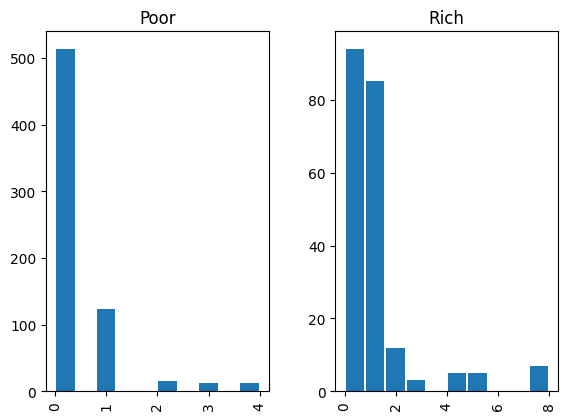

In [8]:
# Mean age of the first 10 passengers
titanic.iloc[:10,:]["Age"].mean()

# Survival rate of passengers older than the mean age
titanic[titanic["Age"] > titanic["Age"].mean()]["Survived"].mean()

# Existing family sizes
titanic["SibSp"].unique()

# Names of members of the largest family
titanic[titanic["SibSp"] == 8].index

# Histogram
titanic.hist("SibSp", lambda x: "Poor" if titanic["Fare"].loc[x] < titanic["Fare"].mean() else "Rich", rwidth=0.9)